<a href="https://colab.research.google.com/github/CogPsychCoding/psych138files/blob/main/Lectures/Lecture16/Lecture16_class2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup - Run Each Of These Next 5 Cells To Setup Session
(note: these 5 cells can be safely re-run each session, you won't overwrite your work)

In [ ]:
from google.colab import drive, files

import os
import random
import string
import zipfile
import csv
import statistics
from pprint import pprint
import pandas as pd

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<mark>IMPORTANT: You Must First Change This String vvv To Refer To The Location Of YOUR Notebook</mark>

In [ ]:
this_folder = '/content/drive/MyDrive/0_Psych138/Lectures/Lecture16'
os.chdir(this_folder)
print(os.getcwd())

/content/drive/MyDrive/0_Psych138/Lectures/Lecture16


In [ ]:
os.makedirs(os.path.join('data', 'choicetask'), exist_ok=True)
print(os.listdir())
print(os.listdir('data'))

In [ ]:
!gdown "https://bit.ly/138DataFilesA" -O datafiles.zip

In [ ]:
# normally I want imports to go at top, but this one is a special case where
# google colab has an import issue. putting the import here solves this:
import zipfile

if not os.path.isfile('datafiles.zip'):
    print('You have to wait a sec for datafiles.zip to finish downloading!')
else:
    with zipfile.ZipFile('datafiles.zip', 'r') as zipfile:
        # assumes you've called os.chdir() to the folder that holds this notebook!
        zipfile.extractall(path=os.path.join('data', 'choicetask'))
print(os.listdir(os.path.join('data', 'choicetask', 'datafiles')))

# Lecture 16



## NOTES:
- We're skipping the `pathlib` module, just keep us the `os` module
- I suggested we would not use the csv module last class, but we are!!

# Reading CSV Files

### Let's say you wanted to determine the mean RT for CORRECT RTs in the ChoiceTask experiment. Howe would you do begin?

### That would be ok, but csv files can be messy. What if a cell's value was a sentence that contained commas, or a double quotation? What if the csv text started on the 2nd line rather than the first? What if there as an extra comma at the end of every line? It could get difficult to properly parse the text without knowing beforehand what it looked like.

### If things are simple, you can do this just by treating a csv file as a text file:

In [ ]:
# to avoid retyping this all the time
dr = os.path.join('data', 'choicetask', 'datafiles')
dr
os.listdir(os.getcwd())

['data', 'Lecture16_class.ipynb', 'datafiles.zip', 'Lecture16_Outline.ipynb']

In [ ]:
# you don't actually **need** anything new to read csv files!
with open(os.path.join(dr, 'data_file_2.csv'), 'r') as infile:
    lines = infile.readlines()

lines = [line.strip() for line in lines]
lines = [line.split(',') for line in lines]

pprint(lines, width=100)


[['CONDITION', 'TASKTYPE', 'DIFFICULTY', 'TRIAL', 'RT', 'STIMCOLOR', 'ACCURACY'],
 ['Cond2', 'choicetask', 'Easy', '0', '683', 'Yellow', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '1', '583', 'Green', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '2', '650', 'Yellow', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '3', '616', 'Green', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '4', '700', 'Green', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '5', '633', 'Red', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '6', '766', 'Blue', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '7', '716', 'Blue', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '8', '533', 'Blue', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '9', '583', 'Blue', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '10', '550', 'Yellow', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '11', '716', 'Blue', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '12', '700', 'Green', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '13', '566', 'Yellow', 'CORR

### The `csv` module is built for reading csv files, even complex ones.

In [ ]:
# however, you should always use something designed to read in csv files and all their potential complexity.
lines = []

with open(os.path.join(dr, 'data_file_2.csv'), 'r') as infile:
    reader = csv.reader(infile)
    lines = list(reader)

# for line in lines:
#     print(line)

pprint(lines, width=100)
# print(lines)

[['CONDITION', 'TASKTYPE', 'DIFFICULTY', 'TRIAL', 'RT', 'STIMCOLOR', 'ACCURACY'],
 ['Cond2', 'choicetask', 'Easy', '0', '683', 'Yellow', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '1', '583', 'Green', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '2', '650', 'Yellow', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '3', '616', 'Green', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '4', '700', 'Green', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '5', '633', 'Red', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '6', '766', 'Blue', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '7', '716', 'Blue', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '8', '533', 'Blue', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '9', '583', 'Blue', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '10', '550', 'Yellow', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '11', '716', 'Blue', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '12', '700', 'Green', 'CORRECT'],
 ['Cond2', 'choicetask', 'Easy', '13', '566', 'Yellow', 'CORR

### It doesn't look much different (in fact, the csv version has 1 extra line), but NOT using the csv module for csv files will eventually lead to problems.

## Isolating Columns To Filter or Analyze Data

- How would you remove rows in which ACCURACY was 'INCORRECT'?
- How would you calculate the accuracy?
- Hoq would you calculate the mean Correct RT?


In [ ]:
lines = lines[1:]

In [ ]:
# Calculate Acuracy
accuracy = [line[-1] for line in lines]
print(f'accuracy = {accuracy.count("CORRECT")/len(accuracy)*100:0.2f}%')

accuracy = 96.67%


In [ ]:
# Create a copy of data that contains only correct trials
# data = []
# for line in lines:
#     if line[-1] == 'CORRECT':
#         data.append(line)

data = [line for line in lines if line[-1] == 'CORRECT']
pprint(data, width=100)

In [ ]:
# Calculate mean correct RT
rts = [line[-3] for line in data]
print(rts)
mean_rt = statistics.mean([int(rt) for rt in rts])
print(f'mean correct RT = {mean_rt:0.2f}')

['683', '583', '650', '616', '700', '633', '766', '716', '533', '583', '550', '716', '700', '566', '566', '466', '1000', '566', '883', '583', '583', '716', '616', '566', '416', '516', '566', '683', '766']
mean correct RT = 637.48


In [ ]:
a = list('12345')
b = list('abcdef')
print(a)
print(b)
# a = a + b
a.extend(b)
print(a)

['1', '2', '3', '4', '5']
['a', 'b', 'c', 'd', 'e', 'f']
['1', '2', '3', '4', '5', 'a', 'b', 'c', 'd', 'e', 'f']


## Things to try

- read in all rows of data from all files and put them into one large list (don't forget to ignore the header row)
- remove all rows whose RTs are less than 250 or greater than 900
- remove all incorrect trials
- remove all trial 0's
- what is the mean RT for this task?
- what is the mean ACCURACY for this task?
- what is the mean RT for Red trials?
- what is the mean RT for Green trials?
- what is the mean RT for Blue trials?
- what is the mean RT for Yellow trials?

NOTE: when answering the mean RT questions over all participants, remember that you will have to get the mean for participant, store them, and then report the mean of those means. Similarly, when computing the mean ACURACY over all of the participants, you will need to report the average of each individual's accuracy.


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><hr>

### Exception Handling


In [ ]:
file = 'travis.txt'

if os.path.isfile(file):
    with open(file, 'r') as infile:
        text = infile.read()
    print(f'there are {len(text)} chars in that file.')
else:
    print(f'FOOL!!! {file} does not exist!')

In [ ]:
file = 'travis.txt'

try:
    with open(file, 'r') as infile:
        text = infile.read()
    print(text)
except FileNotFoundError:
    print('that does not work...try another file')
except IOError:
    print('oops...having trouble reading this file')




that does not work...try another file


In [ ]:
try:
    with open(file, 'r') as infile:
        text = infile.read()
    print(text)
except Exception as e:
    print(e)

[Errno 107] Transport endpoint is not connected: 'travis.txt'


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><hr>

### Pandas (**pandas is not allowed on the final exam!**)

In [ ]:
# opening csv files with pandas (can open xlsx files too!)
data = pd.read_csv(os.path.join(dr, 'data_file_2.csv'))

data

,CONDITION,TASKTYPE,DIFFICULTY,TRIAL,RT,STIMCOLOR,ACCURACY
0,Cond2,choicetask,Easy,0,683,Yellow,CORRECT
1,Cond2,choicetask,Easy,1,583,Green,CORRECT
2,Cond2,choicetask,Easy,2,650,Yellow,CORRECT
3,Cond2,choicetask,Easy,3,616,Green,CORRECT
4,Cond2,choicetask,Easy,4,700,Green,CORRECT
5,Cond2,choicetask,Easy,5,633,Red,CORRECT
6,Cond2,choicetask,Easy,6,766,Blue,CORRECT
7,Cond2,choicetask,Easy,7,716,Blue,CORRECT
8,Cond2,choicetask,Easy,8,533,Blue,CORRECT
9,Cond2,choicetask,Easy,9,583,Blue,CORRECT


In [ ]:
# access RT column
data['RT']

0      683
1      583
2      650
3      616
4      700
5      633
6      766
7      716
8      533
9      583
10     550
11     716
12     700
13     566
14     566
15     466
16    1000
17     566
18     566
19     883
20     583
21     583
22     716
23     616
24     566
25     416
26     516
27     566
28     683
29     766
Name: RT, dtype: int64

In [ ]:
# get mean of RT column
data['RT'].mean()

635.1

In [ ]:
# get mean of RT column after filtering out any non correct trials
data.query('ACCURACY=="CORRECT"')['RT'].mean()

637.4827586206897

<Axes: >

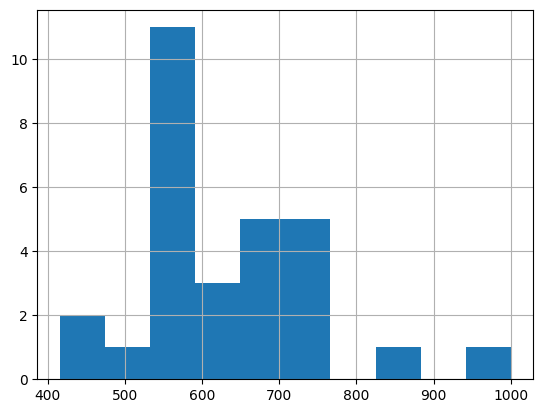

In [ ]:
# plot a histogram of RTs
data.query('ACCURACY=="CORRECT"')['RT'].hist()